In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [11]:
def euler_method(f, y_init, t_init, t_end, t_step):
    y_vals = []
    y_curr = y_init
    for t_curr in np.arange(t_init, t_end, t_step):
        y_vals.append(y_curr)
        y_curr = y_curr + f(y_curr, t_curr) * t_step
    return np.array(y_vals)

In [12]:
def rk4(f, y_init, t_init, t_end, t_step):
    y_vals = []
    y_curr = y_init
    for t_curr in np.arange(t_init, t_end, t_step):
        y_vals.append(y_curr)
        k1 = t_step * f(y_curr, t_curr)
        k2 = t_step * f(y_curr + k1/2, t_curr + t_step/2)
        k3 = t_step * f(y_curr + k2/2, t_curr + t_step/2)
        k4 = t_step * f(y_curr + k3, t_curr + t_step)
        y_curr = y_curr + (k1 + 2*k2 + 2*k3 + k4)/6
    return np.array(y_vals)

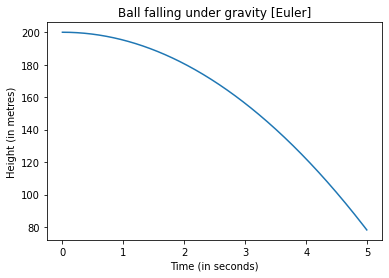

In [13]:
# Modelling the dropping of a ball from height h_0

def f(y, t):
    """
    :param y: height
    :param t: time
    """
    g = 9.8
    return -g*t

h_0 = 200
h_vals = euler_method(f, h_0, 0, 5, 0.01)

plt.xlabel("Time (in seconds)")
plt.ylabel("Height (in metres)")
plt.title("Ball falling under gravity [Euler]")
plt.plot(np.arange(0, 5, 0.01), h_vals)

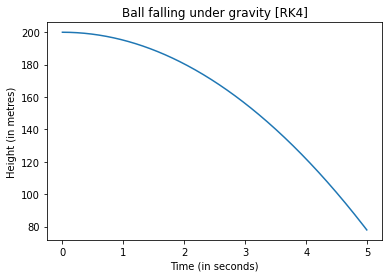

In [14]:
# Modelling the dropping of a ball from height h_0

def f(y, t):
    """
    :param y: height
    :param t: time
    """
    g = 9.8
    return -g*t

h_0 = 200
h_vals = rk4(f, h_0, 0, 5, 0.01)

plt.xlabel("Time (in seconds)")
plt.ylabel("Height (in metres)")
plt.title("Ball falling under gravity [RK4]")
plt.plot(np.arange(0, 5, 0.01), h_vals)

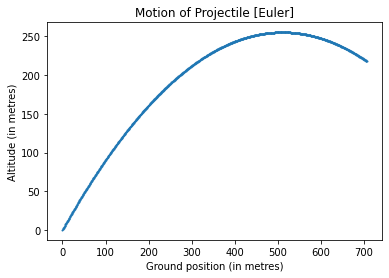

In [15]:
# Modelling the motion of a projectile

def f(params, t):
    """
    :param y: tuple (x_0, y_0, v_x, v_y)
    :param x: x position
    :param y: y position
    :param v_x: x component of velocity
    :param v_y: y component of velocity
    """
    g = 9.8
    x, y, v_x, v_y = params
    return np.array((v_x, v_y, 0, -g))
    

x_0 = 0
y_0 = 0
v_0 = 100
theta = np.pi/4
vals = euler_method(f, np.array((x_0, y_0, v_0*np.cos(theta), v_0*np.sin(theta))), 0, 10, 0.01)
x_vals, y_vals = [], []
for val in vals:
    x_vals.append(val[0])
    y_vals.append(val[1])

plt.xlabel("Ground position (in metres)")
plt.ylabel("Altitude (in metres)")
plt.title("Motion of Projectile [Euler]")
plt.scatter(x_vals, y_vals, s=1)

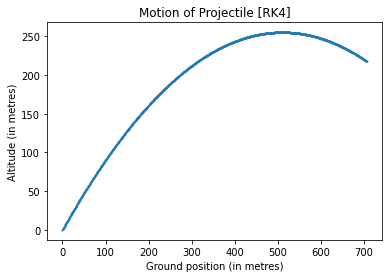

In [16]:
# Modelling the motion of a projectile

def f(params, t):
    """
    :param y: tuple (x_0, y_0, v_x, v_y)
    :param x: x position
    :param y: y position
    :param v_x: x component of velocity
    :param v_y: y component of velocity
    """
    g = 9.8
    x, y, v_x, v_y = params
    return np.array((v_x, v_y, 0, -g))
    

x_0 = 0
y_0 = 0
v_0 = 100
theta = np.pi/4
vals = rk4(f, np.array((x_0, y_0, v_0*np.cos(theta), v_0*np.sin(theta))), 0, 10, 0.01)
x_vals, y_vals = [], []
for val in vals:
    x_vals.append(val[0])
    y_vals.append(val[1])

plt.xlabel("Ground position (in metres)")
plt.ylabel("Altitude (in metres)")
plt.title("Motion of Projectile [RK4]")
plt.scatter(x_vals, y_vals, s=1)

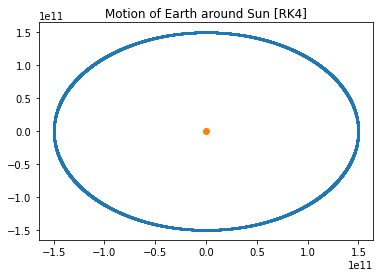

In [17]:
# Modelling planetary motion [Actual Data]

def f(params, t):
    m_earth = 5.9722e24
    m_sun = 1.9891e30
    G = 6.6743e-11
    # Sun is situated at (0, 0)
    x, y, v_x, v_y = params
    dx = v_x
    dy = v_y
    theta = np.arctan2(y, x)
    F = -G*m_earth*m_sun/(x**2 + y**2)
    dv_x = (F/m_earth) * np.cos(theta)
    dv_y = (F/m_earth) * np.sin(theta)
    return np.array((dx, dy, dv_x, dv_y))

orbital_radius = 149.77e9
orbital_velocity = 29.78e3
SECOND = 1; MINUTE = 60 * SECOND; HOUR = 60 * MINUTE; DAY = 24 * HOUR; YEAR = 365.25 * DAY
time_end = 100*YEAR
vals = rk4(f, np.array((orbital_radius, 0, 0, orbital_velocity)), 0, time_end, DAY)
x_vals, y_vals = [], []
for val in vals:
    x_vals.append(val[0])
    y_vals.append(val[1])

plt.title("Motion of Earth around Sun [RK4]")
plt.scatter(x_vals, y_vals, s=1)
plt.scatter(0, 0)

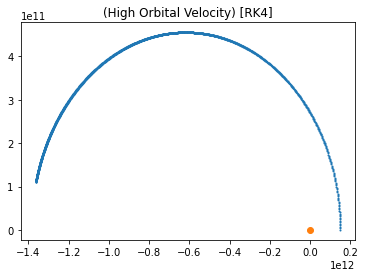

In [18]:
# Modelling planetary motion [High Orbital Velocity]

def f(params, t):
    m_earth = 5.9722e24
    m_sun = 1.9891e30
    G = 6.6743e-11
    # Sun is situated at (0, 0)
    x, y, v_x, v_y = params
    dx = v_x
    dy = v_y
    theta = np.arctan2(y, x)
    F = -G*m_earth*m_sun/(x**2 + y**2)
    dv_x = (F/m_earth) * np.cos(theta)
    dv_y = (F/m_earth) * np.sin(theta)
    return np.array((dx, dy, dv_x, dv_y))

orbital_radius = 149.77e9
orbital_velocity = 40e3
SECOND = 1; MINUTE = 60 * SECOND; HOUR = 60 * MINUTE; DAY = 24 * HOUR; YEAR = 365.25 * DAY
time_end = 5*YEAR
vals = rk4(f, np.array((orbital_radius, 0, 0, orbital_velocity)), 0, time_end, DAY)
x_vals, y_vals = [], []
for val in vals:
    x_vals.append(val[0])
    y_vals.append(val[1])

plt.title("(High Orbital Velocity) [RK4]")
plt.scatter(x_vals, y_vals, s=1)
plt.scatter(0, 0)

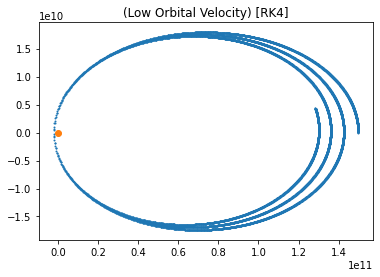

In [19]:
# Modelling planetary motion [Low Orbital Velocity]

def f(params, t):
    m_earth = 5.9722e24
    m_sun = 1.9891e30
    G = 6.6743e-11
    # Sun is situated at (0, 0)
    x, y, v_x, v_y = params
    dx = v_x
    dy = v_y
    theta = np.arctan2(y, x)
    F = -G*m_earth*m_sun/(x**2 + y**2)
    dv_x = (F/m_earth) * np.cos(theta)
    dv_y = (F/m_earth) * np.sin(theta)
    return np.array((dx, dy, dv_x, dv_y))

orbital_radius = 149.77e9
orbital_velocity = 5e3
SECOND = 1; MINUTE = 60 * SECOND; HOUR = 60 * MINUTE; DAY = 24 * HOUR; YEAR = 365.25 * DAY
time_end = YEAR
vals = rk4(f, np.array((orbital_radius, 0, 0, orbital_velocity)), 0, time_end, HOUR)
x_vals, y_vals = [], []
for val in vals:
    x_vals.append(val[0])
    y_vals.append(val[1])

plt.title("(Low Orbital Velocity) [RK4]")
plt.scatter(x_vals, y_vals, s=1)
plt.scatter(0, 0)